In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
# To make this notebook's output identical for every run
np.random.seed(0)

In [3]:
df = pd.read_csv('cdmx_listings.csv', index_col='id')

In [9]:
df_explore = df.copy()

In [13]:
df_explore.shape

(20093, 73)

In [12]:
df_explore.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43148947,https://www.airbnb.com/rooms/43148947,20220326120954,2022-03-27,Habitación con baño privado muy cerca del AICDMX.,Hola! <br /><br />La habitación esta lista par...,Esta zona esta considerada como zona residenci...,https://a0.muscache.com/pictures/faf1c49a-a48b...,343526613,https://www.airbnb.com/users/show/343526613,Brenda,2020-04-09,"Mexico City, Mexico City, Mexico",NaN,a few days or more,33%,50%,f,https://a0.muscache.com/im/pictures/user/85e4c...,https://a0.muscache.com/im/pictures/user/85e4c...,NaN,0.0,0.0,[],t,f,"Nezahualcóyotl, Estado de México, Mexico",Gustavo A. Madero,NaN,19.46565,-99.05467,Private room in rental unit,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Dedicated workspace"", ""Essentials"", ...",$246.00,1,15,1.0,1.0,15.0,15.0,1.0,15.0,NaN,t,0,17,47,322,2022-03-27,4,4,0,2021-04-25,2021-10-06,4.25,4.75,4.50,4.75,4.75,5.00,4.75,NaN,f,1,0,1,0,0.36
22973104,https://www.airbnb.com/rooms/22973104,20220326120954,2022-03-27,"Depa1 Fácil Acceso Aeropuerto, Metro,Bosque Ar...",NO ESTOY EN LA COLONIA BOSQUES DE ARAGÓN. Disp...,"Es una colonia tranquila, con negocios cercano...",https://a0.muscache.com/pictures/dd3362a7-1fb7...,170284149,https://www.airbnb.com/users/show/170284149,Eunice,2018-01-27,MX,NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/12189...,https://a0.muscache.com/im/pictures/user/12189...,NaN,2.0,2.0,"['email', 'phone', 'google']",t,t,"Nezahualcóyotl, Estado de México, Mexico",Gustavo A. Madero,NaN,19.45781,-99.05398,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""Host greets you"", ""Hot water"",...",$294.00,1,60,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,14,40,69,344,2022-03-27,129,24,1,2018-02-09,2022-03-07,4.92,4.96,4.99,4.95,4.96,4.55,4.85,NaN,t,2,2,0,0,2.57
22752825,https://www.airbnb.com/rooms/22752825,20220326120954,2022-03-27,Beautiful Loft 15min from CDMX Airport,To 15 minutes from the CDMX Airport. Our apart...,We are located in a private street near the CD...,https://a0.muscache.com/pictures/dfca721e-7880...,160773275,https://www.airbnb.com/users/show/160773275,Gonzalo,2017-11-30,"Mexico City, Mexico City, Mexico","Hi, I'm Gonzalo, I work as a photographer. I m...",within an hour,92%,93%,f,https://a0.muscache.com/im/pictures/user/d3d0a...,https://a0.muscache.com/im/pictures/user/d3d0a...,NaN,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Nezahualcóyotl, Estado de México, Mexico",Gustavo A. Madero,NaN,19.46194,-99.05415,Entire loft,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Smoke alarm"", ""Essentials"", ""Oven"", ""Hot wat...",$519.00,2,60,2.0,2

In [14]:
df_explore.isna().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
description                                     1058
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3757
Length: 73, dtype: int64

In [25]:
# Sort by dtype

dep_var = ['price']

categorical_vars = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                    'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text',
                    'instant_bookable', 'amenities']

discrete_vars = ['host_listings_count', 'accommodates', 'bedrooms', 'beds',
                 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                 'review_scores_communication', 'review_scores_location']

continuous_vars = ['latitude', 'longitude', 'reviews_per_month']

In [26]:
df_explore = df_explore[categorical_vars+discrete_vars+continuous_vars+dep_var]

In [51]:
df_explore['price'] = df_explore['price'].str.replace("$","").str.replace(",","").astype(float)

C:\Users\BRUNO~1.GON\AppData\Local\Temp/ipykernel_5816/2901242174.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_explore['price'] = df_explore['price'].str.replace("$","").str.replace(",","").astype(float)


In [53]:
df_explore.isna().sum()

host_is_superhost              0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
instant_bookable               0
amenities                      0
host_listings_count            0
accommodates                   0
bedrooms                       0
beds                           0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_communication    0
review_scores_location         0
latitude                       0
longitude                      0
reviews_per_month              0
price                          0
dtype: int64

In [54]:
df_explore = df_explore.dropna()

In [55]:
df_explore.shape

(15530, 26)

In [56]:
df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,price,host_listings_count,accommodates,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_communication,review_scores_communication,review_scores_communication,review_scores_location,latitude,longitude,reviews_per_month
count,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.00000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000,15530.000000
mean,1290.609981,14.328912,3.282421,1.521700,1.961365,236.965808,38.500000,4.73243,4.790854,4.751427,4.841875,4.825209,4.825209,4.825209,4.825209,4.845816,19.402464,-99.167853,1.535254
std,3083.508682,46.512462,2.118720,1.041393,1.624298,123.193501,58.413948,0.46651,0.454666,0.464158,0.411053,0.438807,0.438807,0.438807,0.438807,0.379423,0.043002,0.034580,2.029064
min,99.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.186960,-99.339630,0.010000
25%,500.000000,1.000000,2.000000,1.000000,1.000000,134.000000,5.000000,4.67250,4.780000,4.710000,4.840000,4.830000,4.830000,4.830000,4.830000,4.840000,19.383160,-99.179721,0.360000
50%,875.000000,2.000000,3.000000,1.000000,2.000000,286.500000,16.000000,4.85000,4.910000,4.880000,4.950000,4.950000,4.950000,4.950000,4.950000,4.950000,19.413877,-99.167965,1.000000
75%,1450.750000,7.000000,4.000000,2.000000,2.000000,350.000000,46.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,19.431420,-99.153683,2.080000
max,199999.000000,428.000000,16.000000,50.000000,50.000000,365.000000,727.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,19.549056,-98.962270,56.200000


C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

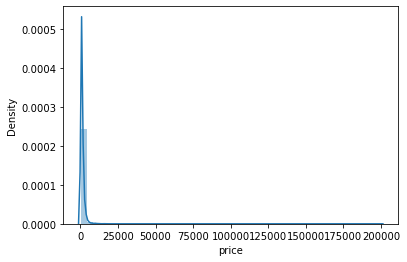

In [57]:
sns.distplot(df_explore['price'])

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


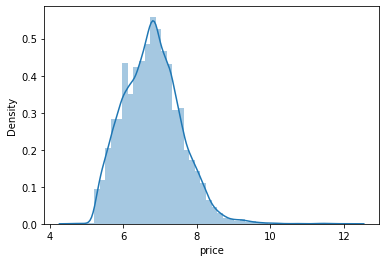

In [58]:
sns.distplot(np.log(df_explore['price']))
df_explore['log_price'] = np.log(df_explore['price'])

In [63]:
review_vars = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
               'review_scores_communication', 'review_scores_location', 'reviews_per_month']

df_explore = df_explore.drop(review_vars, axis=1)

discrete_vars = [x for x in discrete_vars if x not in review_vars]
continuous_vars = [x for x in continuous_vars if x not in review_vars]

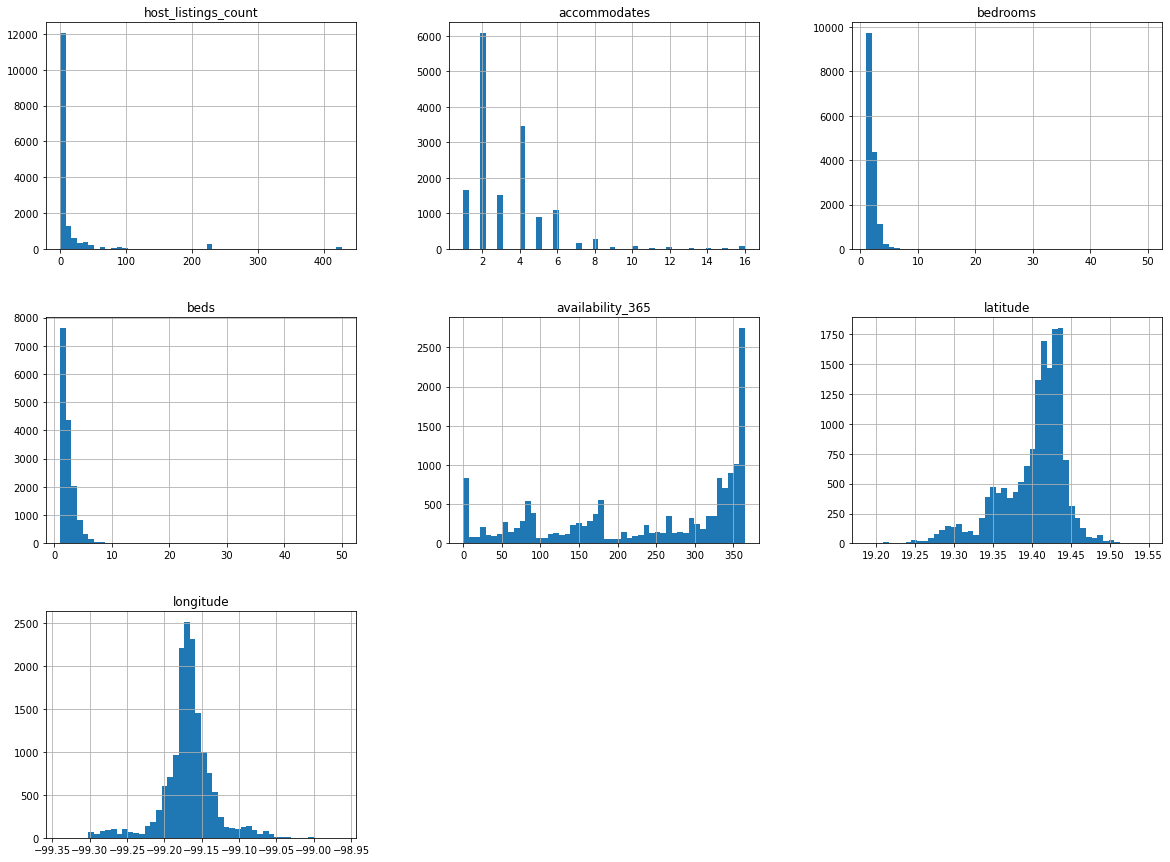

In [64]:
# we use the .hist() pandas function here for the more compact view
# we can accomplish the same with plt.subplots, sns.distplot() and a few extra lines of code
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

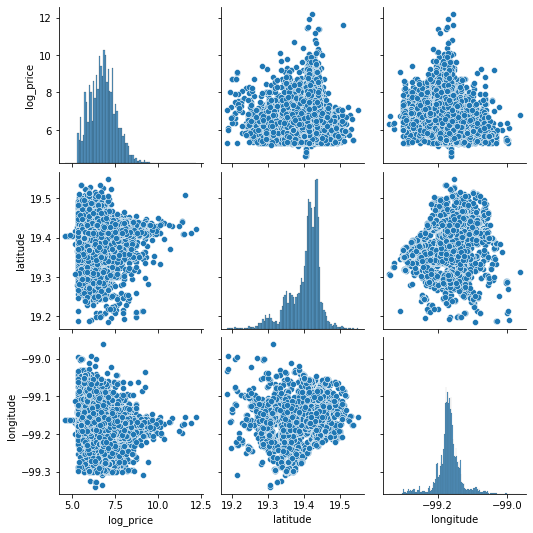

In [65]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + continuous_vars])
plt.show()

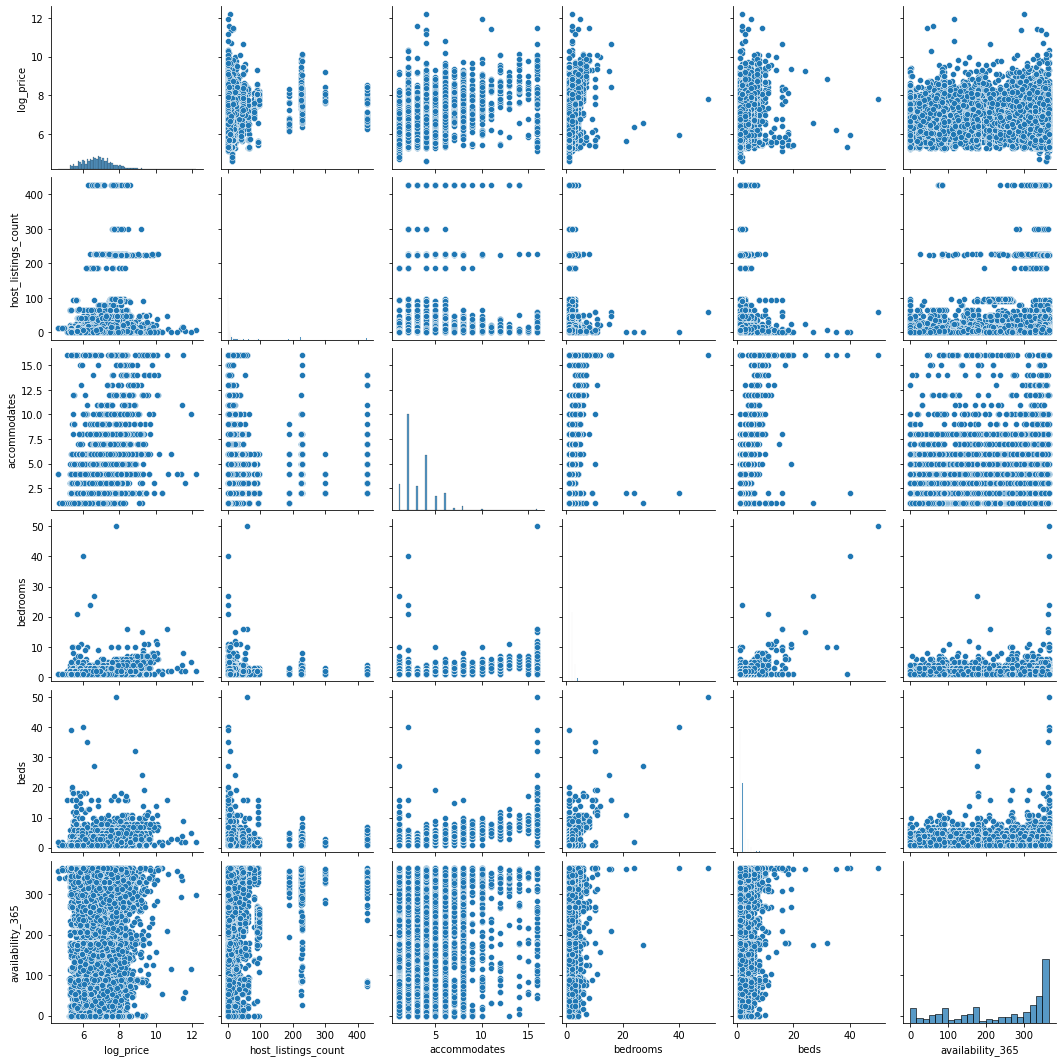

In [66]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + discrete_vars])
plt.show()

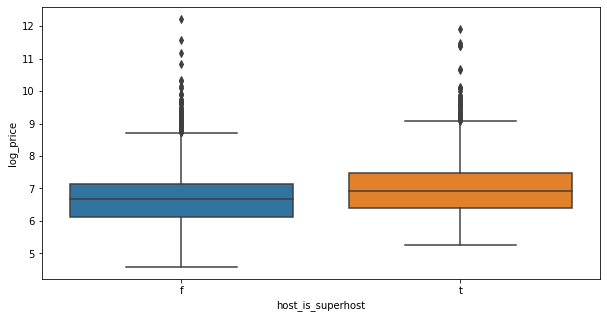

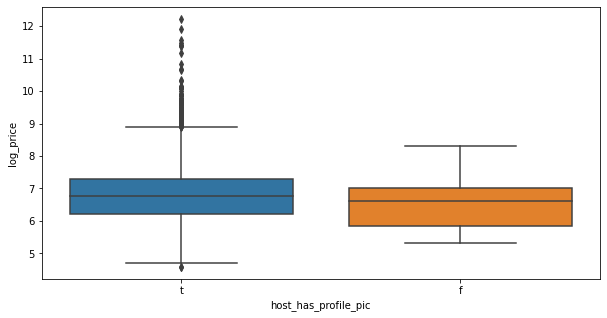

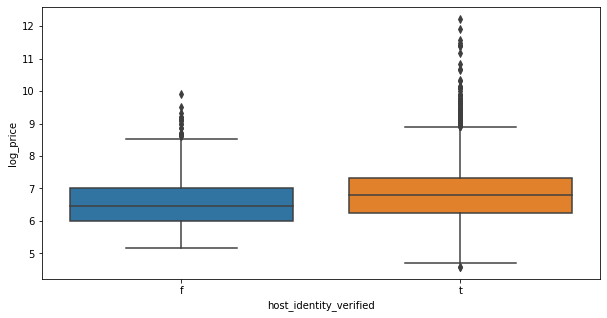

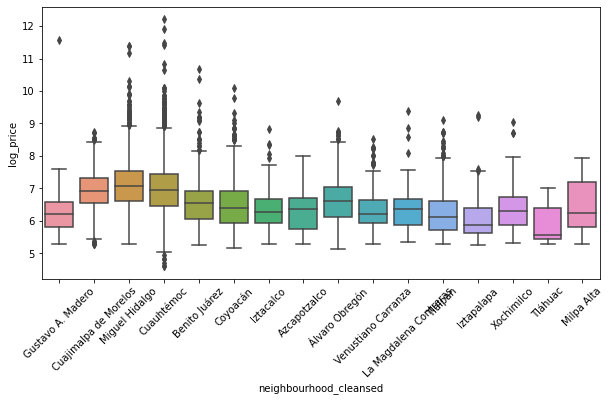

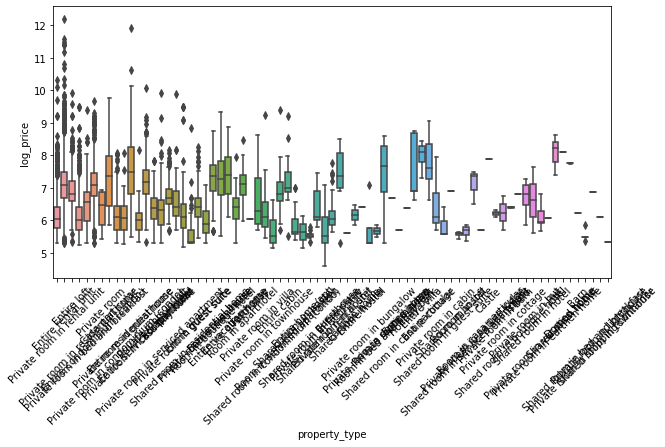

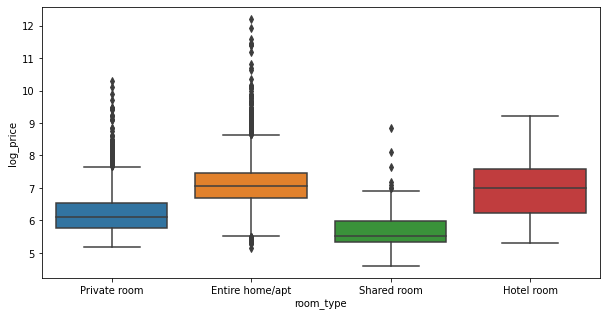

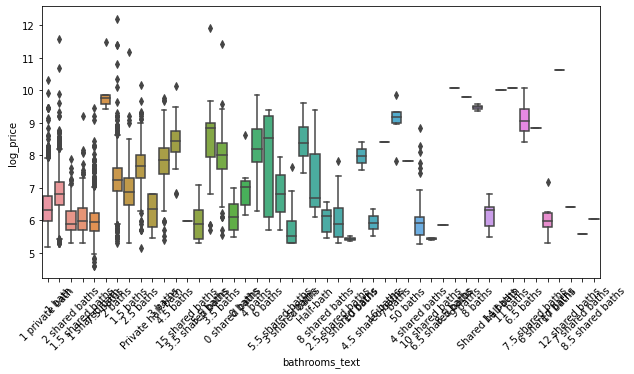

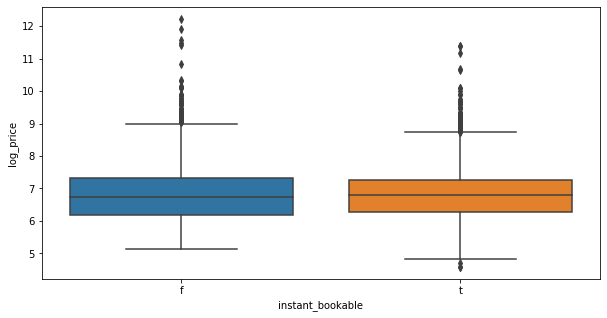

In [67]:
for item in [x for x in categorical_vars if x != 'amenities']:
    #    if item == 'amenities':
    #        next
    plt.figure(figsize=(10,5))
    sns.boxplot(x=item, y='log_price', data=df_explore)
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

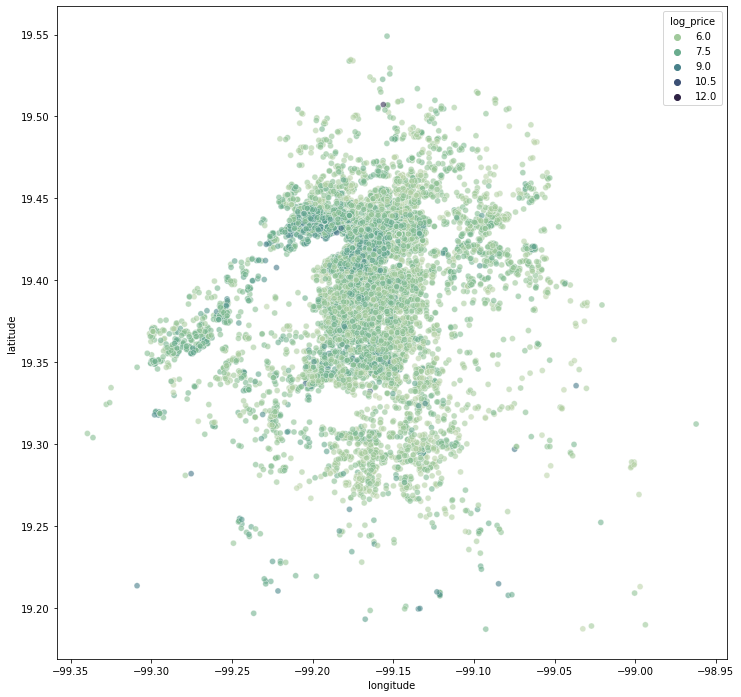

In [69]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
plt.figure(figsize=(12, 12))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', data=df_explore, palette=cmap, alpha=0.6)
plt.show()